In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [41]:
from sklearn import ensemble, model_selection,metrics,datasets,tree 

import numpy as np
import pandas as pd

In [36]:
digits=datasets.load_digits()

In [38]:
digits.data.shape

(1797, 64)

In [98]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [44]:
X=digits.data

In [45]:
y=digits.target

<Figure size 432x288 with 0 Axes>

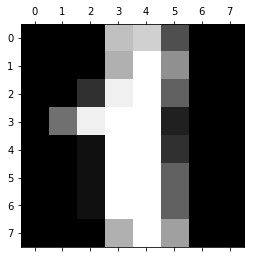

In [50]:
plt.gray() 
plt.matshow(digits.images[1]) 
plt.show() 

**ЗАДАНИЕ 1**
Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [43]:
clf = tree.DecisionTreeClassifier()

Эта функция реализует k-fold cross validation c k равным значению параметра cv. Мы предлагаем использовать k=10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и k=5. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.

In [73]:
quality=model_selection.cross_val_score(clf,X,y, cv=10)

In [74]:
quality.mean()


0.8264056245568223

**Качество работы одного решающего дерева обычно получается не очень высоким, но на этом датасете получилось неплохо. Обратите внимание - дерево вполне могло получиться сильно переобученным, ведь мы не ограничивали его глубину**

In [61]:
with open("answer1.txt", "w") as fout:
    fout.write("".join(str(quality.mean())))


**ЗАДАНИЕ 2**
Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [79]:
сlf_Bagging=ensemble.BaggingClassifier(base_estimator=clf, n_estimators=100)

In [167]:
quality2=model_selection.cross_val_score(сlf_Bagging,X,y, cv=10 )

In [112]:
quality2.mean()

0.9243716631679272

**Деревья неустойчивы к изменениям в обучающей выборке, поэтому в результате усреднения по деревьям, построенным на немного разных выборках (как это происходит в бэггинге), получается более точный ответ**

In [88]:
with open("answer2.txt", "w") as fout:
    fout.write("".join(str(quality2.mean())))


**ЗАДАНИЕ 3** Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на \sqrt{d} 
d
​	  случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [110]:
сlf_Bagging2=ensemble.BaggingClassifier(base_estimator=clf, n_estimators=100, max_features = int(sqrt(X.shape[1])) )

In [111]:
quality3=model_selection.cross_val_score(сlf_Bagging2,X,y, cv=10)

In [113]:
quality3.mean()

0.9349317322880912

**С добавлением выбора случайных признаков деревья стали различаться еще больше, в результате композиция работает лучше**

In [114]:
with open("answer3.txt", "w") as fout:
    fout.write("".join(str(quality3.mean())))


**ЗАДАНИЕ 4** 
Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же \sqrt{d} 
d
​	  признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [115]:
clf1 = tree.DecisionTreeClassifier(max_features = int(sqrt(X.shape[1])))

In [116]:
сlf_Bagging3=ensemble.BaggingClassifier(base_estimator=clf1, n_estimators=100)

In [117]:
quality4=model_selection.cross_val_score(сlf_Bagging3,X,y, cv=10)

In [118]:
quality4.mean()

0.9500260689429171


**Если выбирать случайные признаки в каждой вершине, отличия между деревьями становятся еще более существенными, что хорошо сказывается на качестве работы композиции. Именно так и устроен случайный лес**

In [119]:
with open("answer4.txt", "w") as fout:
    fout.write("".join(str(quality4.mean())))

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

In [154]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators = 100, max_features = 7, random_state = 0)

In [155]:
quality5=model_selection.cross_val_score(rf_classifier,X,y, cv=10, n_jobs=-1)

In [156]:
quality5.mean()

0.9538695619078424

Text(0, 0.5, 'score')

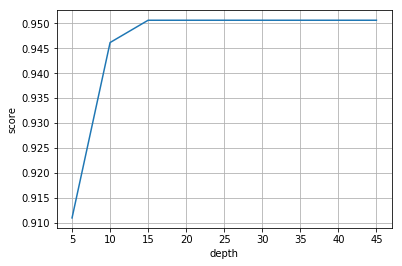

In [164]:
pylab.grid(True)
depth = np.arange(5,50,5)
pylab.plot(depth, [model_selection.cross_val_score(
    ensemble.RandomForestClassifier(n_estimators = 100, max_depth=i, max_features = 8, random_state = 0),
    X,y, cv=10, n_jobs=-1).mean() for i in depth])


plt.xlabel('depth')
plt.ylabel('score')

Text(0, 0.5, 'score')

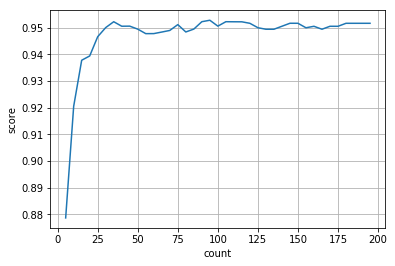

In [170]:
pylab.grid(True)
count = np.arange(5,200,5)
pylab.plot(count, [model_selection.cross_val_score(
    ensemble.RandomForestClassifier(n_estimators = i, max_depth=15, max_features = 8, random_state = 0),
    X,y, cv=10, n_jobs=-1).mean() for i in count])


plt.xlabel('сount')
plt.ylabel('score')

Text(0, 0.5, 'score')

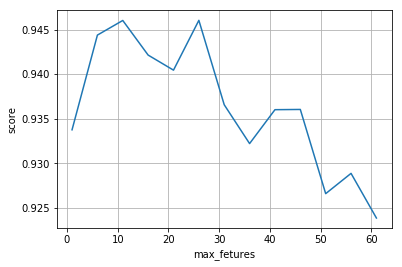

In [169]:
pylab.grid(True)
max_fetures = np.arange(1,64,5)
pylab.plot(max_fetures, [model_selection.cross_val_score(
    ensemble.RandomForestClassifier(n_estimators = 30, max_depth=15, max_features = i, random_state = 0),
    X,y, cv=10, n_jobs=-1).mean() for i in max_fetures])


plt.xlabel('max_fetures')
plt.ylabel('score')

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1) Случайный лес сильно переобучается с ростом количества деревьев  - **нет**

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев -  **да**

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется. - **да**

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция. - **да**

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно. - **нет**

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается. - **нет**

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга). - **да**

In [173]:
with open("answer5.txt", "w") as fout:
    fout.write(" ".join(str(2347)))